# **Webscraping the Questions & Tags from `Stack exchange`**


Here, our ultimate goal is to scrape the Questions & Tags for the webpage Stack Echange of Astronomy category webpage for all the respective pages.

### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
from wordcloud import WordCloud 



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import requests
from requests import get
import warnings
warnings.filterwarnings("ignore")
from requests import get
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.util import *
from nltk.corpus import stopwords
import re
import seaborn as sns
from collections import defaultdict

### Required Pages for Web Scraping:
https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50  
https://astronomy.stackexchange.com/questions?tab=newest&page=2  
:  
:  
:  
:  
:  
https://astronomy.stackexchange.com/questions?tab=newest&page=196  

### creating a list to store the links of all the required pages 

In [2]:
pages_list=[]                         # Empty list that will be appended with the page count

pages_list.append("https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50")

for page in list(range(2, 197)):     # Looping over first 196 webpages

  pages_list.append('https://astronomy.stackexchange.com/questions?tab=newest&page='+str(page))
  
#pages_list  
print(len(pages_list))

196


# **Webscraping Questions**

In [3]:
questions_list=[]                     # Creating an empty list of questions that will be appended with the question counts.

for x in pages_list:                  # Looping over all the pages in the page list
  page = requests.get(x)
  soup = BeautifulSoup(page.text, 'html.parser')

  question_name = soup.find_all('h3')   # Finding the h3 tag that has details of the question
  for question in question_name:
        if question.find('a'):
            questions_list.append(question.find('a').text)

In [4]:
questions_list[:5]

['current community',
 'more stack exchange communities',
 "By how much does Haumea's fast rotation affect its surface gravity?",
 'Is there an O1 or O0 star?',
 'Evolution of galaxies with time']

### As we can in the above output, the `question_list` also contains some unwanted rows which are not the questions i.e. `current community` and `more stack exchange communities`. Hence, we'll remove these rows.

In [5]:
a = ['current community', 'more stack exchange communities']

In [6]:
df = pd.DataFrame(questions_list, columns =['Questions']) 

In [7]:
df.head()

,Questions
0,current community
1,more stack exchange communities
2,By how much does Haumea's fast rotation affect...
3,Is there an O1 or O0 star?
4,Evolution of galaxies with time


In [8]:
df = df[~df['Questions'].isin(a)]

In [9]:
df.head()

,Questions
2,By how much does Haumea's fast rotation affect...
3,Is there an O1 or O0 star?
4,Evolution of galaxies with time
5,How to calculate the frequency of a gas giant ...
6,Plotting Histograms of stellar mass and gas ma...


In [10]:
print(len(df))

9790


# **Webscraping Tags**

In [11]:
def ListToString(str):
  # initialize an empty string 
  str1 = ""
    
  # traverse in the string   
  for element in str:  
      str1 = str1 + element   
     
  return str1

In [12]:
# To get the tags from the webpage





tag=[]

for x in pages_list:
  page = requests.get(x)
  soup = BeautifulSoup(page.text, 'html.parser')

  tags=[]

  for div in soup.find_all('div', {"class": re.compile("^tags")}):      
    tags.append(div.get('class')[1:])



  clean_tags=[]

  for i in tags:
    clean_tags.append(ListToString(i).replace('t-','|'))



  for j in clean_tags:
    tag.append(j[1:])

In [13]:
print(len(tag))
print(tag[:11])

9790
['gravity|rotation', 'star|temperature|spectral-type', 'star|galaxy|dark-matter', 'natural-satellites|gas-giants|mathematics|eclipse-non-earth-related', 'star|galaxy|galactic-halo', 'quasars|galactic-evolution', 'cosmology|expansion', 'photography|pluto', 'planet|saturn|heat', 'galaxy|milky-way|orbital-elements|sagittarius-a', 'light|distances']


In [14]:
print(tag[0])
print(tag[-1])

gravity|rotation
inclination|amateur-observing


### **Storing the `tag` list in `df` dataframe**

In [15]:
df['Tags']=tag

In [16]:
df.head()

,Questions,Tags
2,By how much does Haumea's fast rotation affect...,gravity|rotation
3,Is there an O1 or O0 star?,star|temperature|spectral-type
4,Evolution of galaxies with time,star|galaxy|dark-matter
5,How to calculate the frequency of a gas giant ...,natural-satellites|gas-giants|mathematics|ecli...
6,Plotting Histograms of stellar mass and gas ma...,star|galaxy|galactic-halo


In [17]:
df.tail()

,Questions,Tags
10177,Why can't light escape from a black hole?,black-hole|light
10178,Why do sunspots appear dark?,the-sun|sunspots
10179,Amateur observing targets for binary star syst...,amateur-observing|binary-star
10180,How are the compositional components of exopla...,exoplanet|atmosphere
10181,How do I calculate the inclination of an objec...,inclination|amateur-observing


In [18]:
len(df)

9790

# **Data Analysis**

# Wordcloud for `Tags`

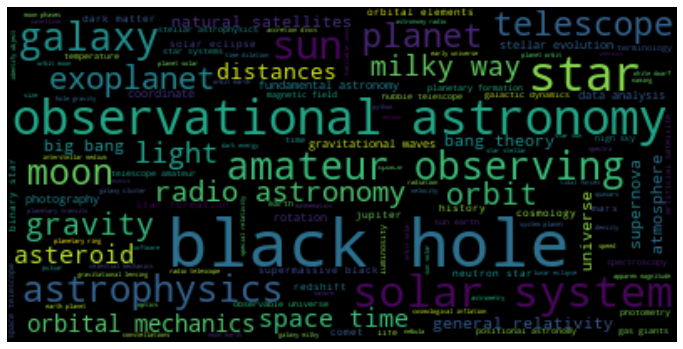

In [19]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Tag in df['Tags']:
    vocab.append(Tag)

vocab=', '.join(vocab)
#print(vocab)


# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud for `Questions`

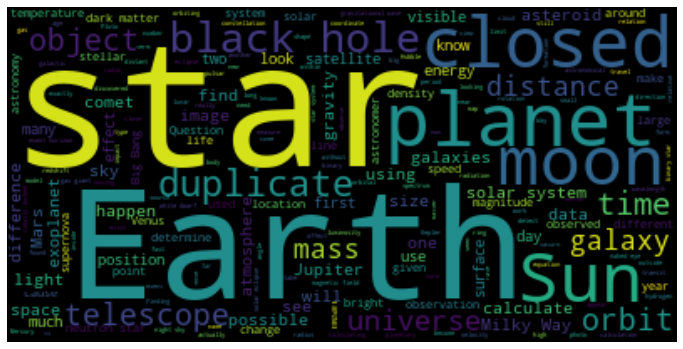

In [20]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Question in df['Questions']:
    vocab.append(Question)

vocab=', '.join(vocab)
#print(vocab)






# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Data Preprocessing**

In [21]:
# Removing special characters, hyperlinks/URL's from the Questions.
df['Questions'] = df['Questions'].str.replace('()','').str.replace(';','').str.replace(':','').str.replace('/',' or ').str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace('.','')

In [22]:
df["Tags"] = [item.replace("|", " __label__") for item in df["Tags"]]
df['Tags'] ='__label__' + df['Tags'].astype(str)
df.head()

,Questions,Tags
2,By how much does Haumeas fast rotation affect ...,__label__gravity __label__rotation
3,Is there an O1 or O0 star?,__label__star __label__temperature __label__sp...
4,Evolution of galaxies with time,__label__star __label__galaxy __label__dark-ma...
5,How to calculate the frequency of a gas giant ...,__label__natural-satellites __label__gas-giant...
6,Plotting Histograms of stellar mass and gas ma...,__label__star __label__galaxy __label__galacti...


In [23]:
columns_titles = ["Tags","Questions"]
df=df.reindex(columns=columns_titles) #reindexing the two columns of dataframe
df.head()

,Tags,Questions
2,__label__gravity __label__rotation,By how much does Haumeas fast rotation affect ...
3,__label__star __label__temperature __label__sp...,Is there an O1 or O0 star?
4,__label__star __label__galaxy __label__dark-ma...,Evolution of galaxies with time
5,__label__natural-satellites __label__gas-giant...,How to calculate the frequency of a gas giant ...
6,__label__star __label__galaxy __label__galacti...,Plotting Histograms of stellar mass and gas ma...


In [24]:
# Removing special characters, hyperlinks/URL's from the Questions and Tags.

df['Questions'] = df['Questions'].str.replace('()','')
df['Questions'] = df['Questions'].str.replace(';','')
df['Questions'] = df['Questions'].str.replace(':','')
df['Questions'] = df['Questions'].str.replace('/','')


df['Tags'] = df['Tags'].str.replace('()','')
df['Tags'] = df['Tags'].str.replace(';','')
df['Tags'] = df['Tags'].str.replace(':','')
df['Tags'] = df['Tags'].str.replace('û','.')
df['Tags'] = df['Tags'].str.replace('\t','')

In [25]:
df["Tags"] = [item.replace("|", " __label__") for item in df["Tags"]]
df['Tags'] ='__label__' + df['Tags'].astype(str)
df.head()

,Tags,Questions
2,__label____label__gravity __label__rotation,By how much does Haumeas fast rotation affect ...
3,__label____label__star __label__temperature __...,Is there an O1 or O0 star?
4,__label____label__star __label__galaxy __label...,Evolution of galaxies with time
5,__label____label__natural-satellites __label__...,How to calculate the frequency of a gas giant ...
6,__label____label__star __label__galaxy __label...,Plotting Histograms of stellar mass and gas ma...


In [26]:
columns_titles = ["Tags","Questions"]
df=df.reindex(columns=columns_titles)
df.head()

,Tags,Questions
2,__label____label__gravity __label__rotation,By how much does Haumeas fast rotation affect ...
3,__label____label__star __label__temperature __...,Is there an O1 or O0 star?
4,__label____label__star __label__galaxy __label...,Evolution of galaxies with time
5,__label____label__natural-satellites __label__...,How to calculate the frequency of a gas giant ...
6,__label____label__star __label__galaxy __label...,Plotting Histograms of stellar mass and gas ma...


# **Writing a `.txt` file from our dataframe data**

In [27]:
f= open("astronomy_n.txt","w+") #open the file for writing
f.close() #finally closing the file 

In [28]:
df.to_csv(r'astronomy_n.txt', header=None, index=None, sep=' ', mode='a')

In [29]:
with open('astronomy_n.txt', 'r') as f, open('astronomy.txt', 'w') as fo:
    for line in f:
        fo.write(line.replace('"', '').replace("'", ""))

# **Splitting the `astronomy.txt` file into Training and Validation for fastText**

In [30]:
!head astronomy.txt

__label____label__gravity __label__rotation By how much does Haumeas fast rotation affect its surface gravity?
__label____label__star __label__temperature __label__spectral-type Is there an O1 or O0 star?
__label____label__star __label__galaxy __label__dark-matter Evolution of galaxies with time
__label____label__natural-satellites __label__gas-giants __label__mathematics __label__eclipse-non-earth-related How to calculate the frequency of a gas giant eclipsing the sun from a moon?
__label____label__star __label__galaxy __label__galactic-halo Plotting Histograms of stellar mass and gas mass given a halo mass
__label____label__quasars __label__galactic-evolution Can Quasars generate Heavy Elements?
__label____label__cosmology __label__expansion Could there really be a preferential direction to the speed of light?
__label____label__photography __label__pluto How bright is it on Pluto in the middle of the day? duplicate
__label____label__planet __label__saturn __label__heat Why has Saturn

In [31]:
!wc astronomy.txt

   9790  125289 1187067 astronomy.txt


In [32]:
# Splitting the data into training and validation.

train_data= round(len(df)*0.85)
validation_data = round(len(df)*0.15) 

print("Number of records for training dataset are:", train_data)
print("Number of records for validation dataset are:", validation_data)

Number of records for training dataset are: 8322
Number of records for validation dataset are: 1468


In [33]:
training_data =pd.read_table("astronomy.txt", nrows=train_data,header=None,error_bad_lines=False,sep='\t')

valid_data =pd.read_table("astronomy.txt",skiprows=train_data,nrows=validation_data,
                          header=None,error_bad_lines=False,sep='\t')

In [34]:
# Saving the training and validation files.

np.savetxt('astronomy.train', training_data.values, fmt='%s', delimiter='\t')
np.savetxt('astronomy.val', valid_data.values, fmt='%s', delimiter='\t')

### **Training Data**

In [35]:
print(training_data.head())
print(len(training_data))

                                                   0
0  __label____label__gravity __label__rotation By...
1  __label____label__star __label__temperature __...
2  __label____label__star __label__galaxy __label...
3  __label____label__natural-satellites __label__...
4  __label____label__star __label__galaxy __label...
8322


### **Validation Data**

In [36]:
print(valid_data.head())
print(len(valid_data))

                                                   0
0  __label____label__fundamental-astronomy US obs...
1  __label____label__telescope __label__exoplanet...
2  __label____label__the-moon __label__gravity __...
3  __label____label__black-hole __label__roche-li...
4  __label____label__earth Near-future astronomic...
1468


# **Applying FastText on `astronomy.txt` file**

In [37]:
pip install fasttext

     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3028067 sha256=b77afd5f8f022a7e13630d78699469af4ccf58c954963b2c4a7bfc905d0b1615
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [38]:
import fasttext

### **Training our first model**

In [39]:
model_1 = fasttext.train_supervised(input="astronomy.train")

In [40]:
model_1.test("astronomy.val")

(1458, 0.11454046639231824, 0.05034669882423877)

### As we can see that when the passed the train data to the fastText Model without pre-processing, the model gave a precision of 13%.

## making model better & processed

In [41]:
cat astronomy.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > astronomy_preprocessed.txt

In [42]:
!wc astronomy_preprocessed.txt

   9790  133621 1203573 astronomy_preprocessed.txt


In [43]:
training_data =pd.read_table("astronomy_preprocessed.txt", nrows=train_data,header=None,error_bad_lines=False,sep='\t')

valid_data =pd.read_table("astronomy_preprocessed.txt",skiprows=train_data,nrows=validation_data,
                          header=None,error_bad_lines=False,sep='\t')

In [44]:
# Saving the training and validation files.
np.savetxt('astronomy_preprocessed.train', training_data.values, fmt='%s', delimiter='\t')
np.savetxt('astronomy_preprocessed.val', valid_data.values, fmt='%s', delimiter='\t')

### **Now, training our second model with preprocessed astronomy data**

In [45]:
model_2 = fasttext.train_supervised(input="astronomy_preprocessed.train")

In [46]:
model_2.test("astronomy_preprocessed.val")

(1458, 0.1289437585733882, 0.05667772083207718)

### As we can see from the model_2 output, pre-processing the data surged the precision around 4%. Now, we can tune in and apply hyper parameters to have a look how the model precision improves in the process.

### **Now, training our third model with 25 epochs**

In [47]:
model_3 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25)

In [48]:
model_3.test("astronomy_preprocessed.val")

(1458, 0.36213991769547327, 0.1591799819113657)

### As we can see from the model_3 output, the epochs increased the precision rapidly to 49% from 17%. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our fourth model with 25 epochs & learning rate**

In [49]:
model_4 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3)

In [50]:
model_4.test("astronomy_preprocessed.val")

(1458, 0.3635116598079561, 0.15978293638830268)

### As we can see from the model_4 output, the learning rate also increased the precision by 2% from 49% to 51%. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our fifth model with 25 epochs, learning rate & word n-grams**

In [51]:
model_5 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3, wordNgrams=2)

In [52]:
model_5.test("astronomy_preprocessed.val")

(1458, 0.3888888888888889, 0.170937594211637)

### As we can see from the model_5 output, the precision didn't change. So, we'll not add word n-grams in our final model. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our sixth model with 25 epochs, learning rate & loss function**

In [53]:
model_6 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3, loss='softmax')

In [54]:
model_6.test("astronomy_preprocessed.val")

(1458, 0.3635116598079561, 0.15978293638830268)

### As we can see from the model_6 output, the loss function slightly increased the precision. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our seventh model by scaling things up**

In [55]:
model_7 = fasttext.train_supervised(input="astronomy_preprocessed.train", lr=0.3, epoch=25, bucket=200000, dim=300, loss='softmax')

In [56]:
model_7.test("astronomy_preprocessed.val")

(1458, 0.3628257887517147, 0.1594814591498342)

### As we can see from the model_7 output, the precision again increased slightly. Therefore, this is our final model with optimal precision and recall.

## **Creating a dataframe of the results which contains the type of model fitted and the Precision and Recall achieved with that Model fit.**

In [57]:
Results = {"Model Type" : ['Model_Unprocessed','Model_PreProcessed','Model_PreProcessed_epochs','Model_PreProcessed_epochs_lr',
                        'Model_PreProcessed_epochs_lr_wordng','Model_PreProcessed_epochs_lr_loss','Model_PreProcessed_scaling_up'],
        "Precision": [model_1.test("astronomy.val")[1],model_2.test("astronomy_preprocessed.val")[1], model_3.test("astronomy_preprocessed.val")[1],model_4.test("astronomy_preprocessed.val")[1],model_5.test("astronomy_preprocessed.val")[1],model_6.test("astronomy_preprocessed.val")[1],model_7.test("astronomy_preprocessed.val")[1]],
        "Recall":[model_1.test("astronomy.val")[2], model_2.test("astronomy_preprocessed.val")[2],model_3.test("astronomy_preprocessed.val")[2],model_4.test("astronomy_preprocessed.val")[2],model_5.test("astronomy_preprocessed.val")[2],model_6.test("astronomy_preprocessed.val")[2],model_7.test("astronomy_preprocessed.val")[2]]}

Results_df = pd.DataFrame(Results)
Results_df

,Model Type,Precision,Recall
0,Model_Unprocessed,0.114540,0.050347
1,Model_PreProcessed,0.128944,0.056678
2,Model_PreProcessed_epochs,0.362140,0.159180
3,Model_PreProcessed_epochs_lr,0.363512,0.159783
4,Model_PreProcessed_epochs_lr_wordng,0.388889,0.170938
5,Model_PreProcessed_epochs_lr_loss,0.363512,0.159783
6,Model_PreProcessed_scaling_up,0.362826,0.159481


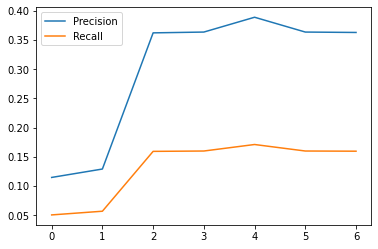

In [58]:
lines = Results_df.plot.line()

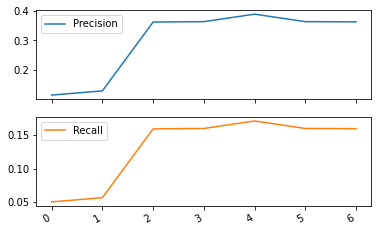

In [59]:
axes = Results_df.plot.line(subplots=True)

# **Therefore, we noticed a significant rise in the precision of our `model_3` and after that we tried some hyperparameters to achieve an accuracy of 52%.**